# Dataloader function

### Imports


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

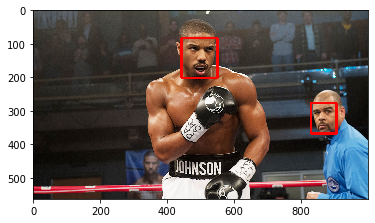

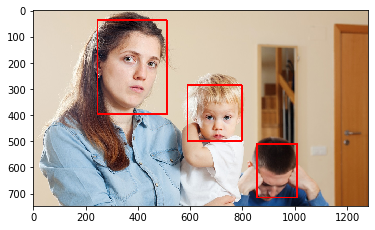

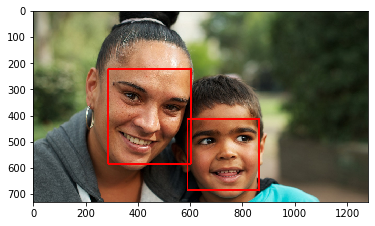

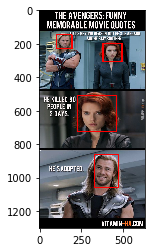

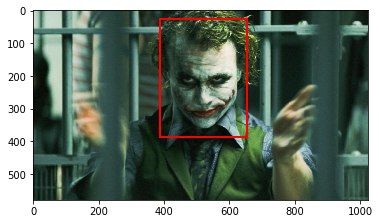

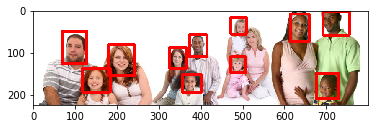

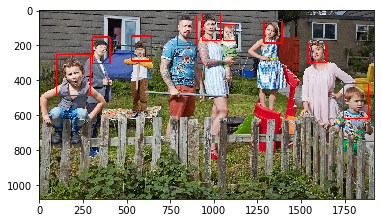

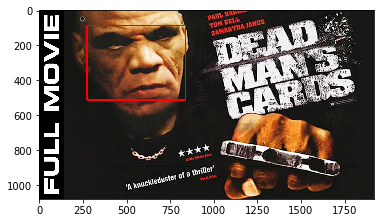

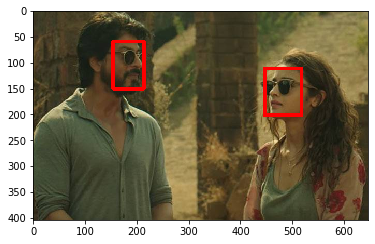

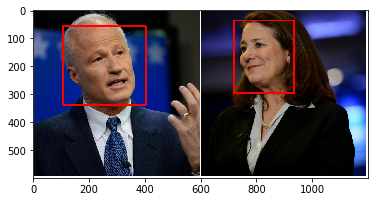

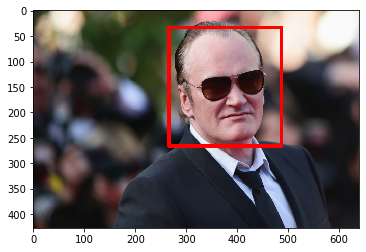

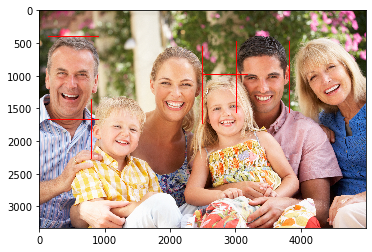

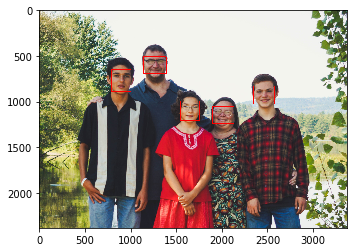

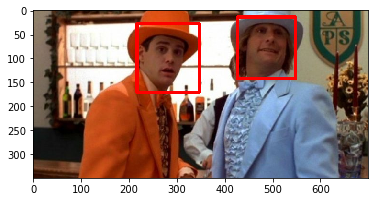

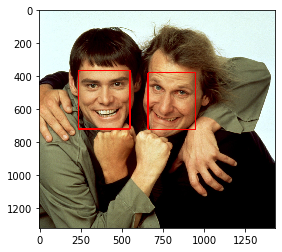

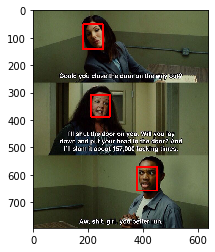

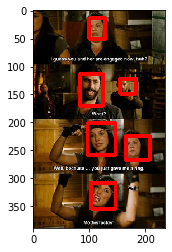

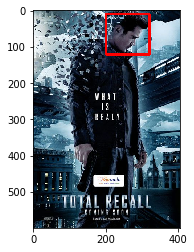

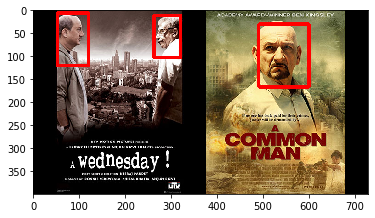

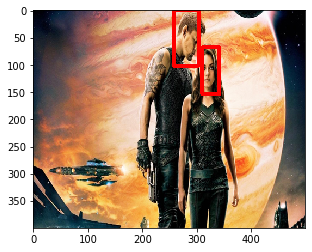

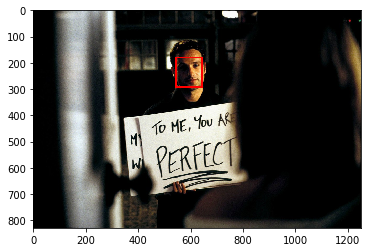

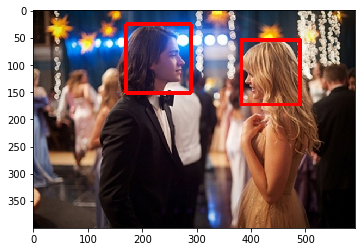

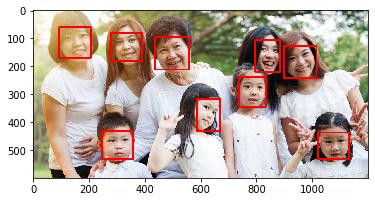

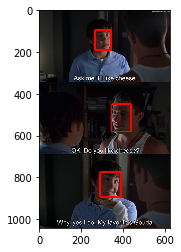

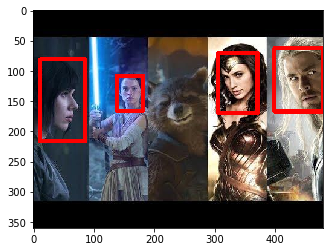

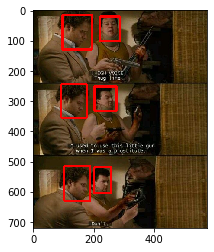

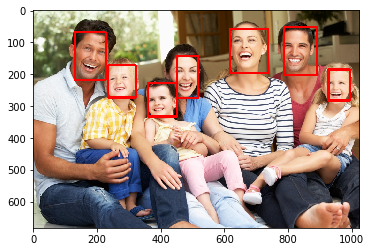

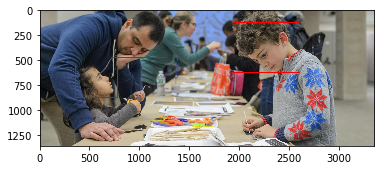

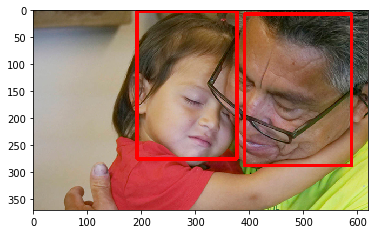

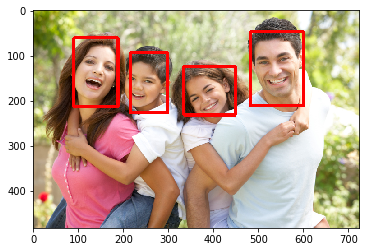

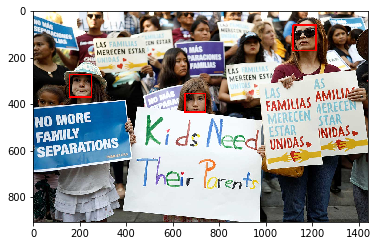

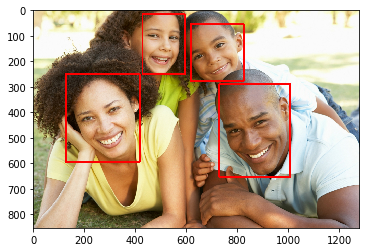

In [5]:

data = np.load('images.npy', allow_pickle=True)

# plt.imshow(data[0,0])
# plt.show()
def dataloader(data, batch_size=32):
    """input: data
        return: ndarray --> [image, bboxs-coordinates]

        bboxs is an ndarray = [[  [x1, y1],
                                  [x2, y2] ],
                               [  [x3, y3],
                                  [x4, y4] ]
                               ]

        """
    for linenumber, line in enumerate(data,1):
        image = line[0]
        if linenumber == 1:
            batch = []
        bboxs = []
        for dictionary in line[1]:
            # label = dictionary['label']

            points = dictionary['points']

            x1 = points[0]['x']
            y1 = points[0]['y']
            x2 = points[1]['x']
            y2 = points[1]['y']

            imageWidth = dictionary['imageWidth']
            imageHeight = dictionary['imageHeight']
            bboxs.append([(int(x1*imageWidth) , int(y1*imageHeight)), (int(x2*imageWidth) ,int(y2*imageHeight))])

        batch.append([image, np.asarray(bboxs)])
        if linenumber % batch_size == 0:
            yield np.asarray(batch)
            batch = []

loader = dataloader(data, batch_size=32)

data = next(loader)
data = next(loader)
data = next(loader)
data = next(loader)
data = next(loader)
data = next(loader)

for i in data:
    for rectangles in i[1]:
        x1 = rectangles[0,0]
        y1 = rectangles[0,1]
        x2 = rectangles[1,0]
        y2 = rectangles[1,1]
        cv2.rectangle(i[0], (x1,y1),(x2,y2), (255, 0, 0), 5)
        plt.imshow(i[0])
    plt.show()
